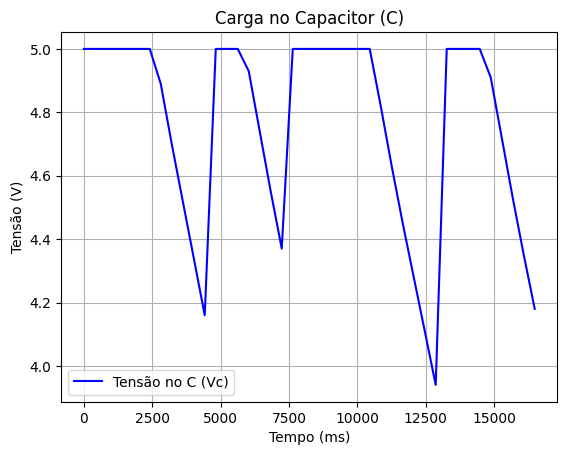

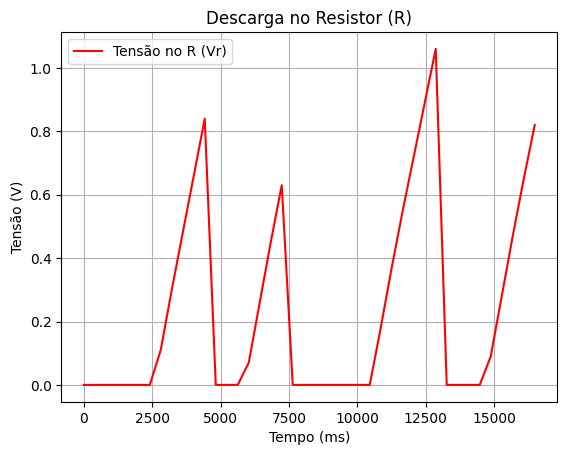

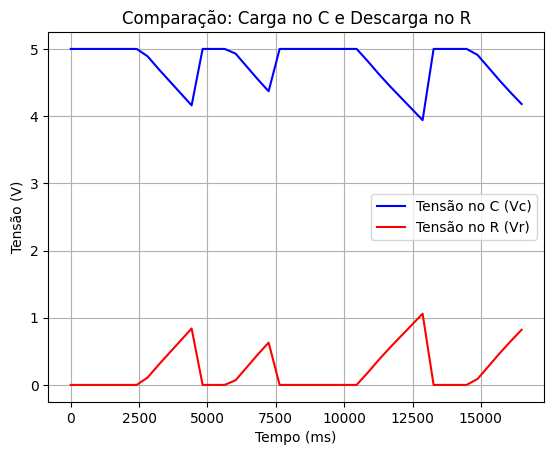

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# 1. COLE OS DADOS DO MONITOR SERIAL AQUI
#    Substitua o conteúdo desta variável pelos dados que você copiou.
dados_serial = """
0 5.00 0.00
401 5.00 0.00
803 5.00 0.00
1205 5.00 0.00
1607 5.00 0.00
2010 5.00 0.00
2412 5.00 0.00
2813 4.89 0.11
3216 4.70 0.30
3618 4.52 0.48
4021 4.34 0.66
4422 4.16 0.84
4825 5.00 0.00
5227 5.00 0.00
5629 5.00 0.00
6031 4.93 0.07
6433 4.74 0.26
6836 4.55 0.45
7238 4.37 0.63
7641 5.00 0.00
8042 5.00 0.00
8444 5.00 0.00
8847 5.00 0.00
9249 5.00 0.00
9651 5.00 0.00
10053 5.00 0.00
10456 5.00 0.00
10858 4.82 0.18
11260 4.63 0.37
11663 4.45 0.55
12065 4.28 0.72
12468 4.11 0.89
12869 3.94 1.06
13272 5.00 0.00
13674 5.00 0.00
14076 5.00 0.00
14479 5.00 0.00
14881 4.91 0.09
15284 4.72 0.28
15686 4.53 0.47
16089 4.35 0.65
16490 4.18 0.82

""" 
# NOTA: Cole seus DADOS REAIS da descarga aqui, 
# os dados acima são apenas um exemplo de como estava antes.
# Seus dados da descarga devem parecer com:
# 30000 4.95 0.05
# 30400 4.90 0.10
# 30800 4.85 0.15
# ...


# --- O CÓDIGO COMEÇA AQUI ---

# 2. Processar os dados
# Usamos o 'io.StringIO' para que o pandas possa ler a string como se fosse um arquivo.
try:
    # 'sep' define que os valores são separados por espaço
    # 'header=None' diz que não temos um cabeçalho
    # 'names' define o nome que daremos para cada coluna
    data = pd.read_csv(
        io.StringIO(dados_serial), 
        sep=' ', 
        header=None, 
        names=['Tempo', 'Tensao_C', 'Tensao_R'],
        # Ignora linhas que não podem ser lidas (como linhas vazias)
        on_bad_lines='skip' 
    )

    # Converte as colunas para números (caso não sejam)
    data['Tempo'] = pd.to_numeric(data['Tempo'])
    data['Tensao_C'] = pd.to_numeric(data['Tensao_C'])
    data['Tensao_R'] = pd.to_numeric(data['Tensao_R'])

    # Remove qualquer linha que possa ter falhado na leitura (virado NaN)
    data = data.dropna()

    # Pega os valores de cada coluna
    tempo_ms = data['Tempo']
    
    # ATENÇÃO: No seu código Arduino:
    # 'tensaoResistor' (coluna 2) é a Tensão no Capacitor (Vc)
    # 'tensaoCapacitor' (coluna 3) é a Tensão no Resistor (Vr)
    tensao_capacitor_vc = data['Tensao_C'] 
    tensao_resistor_vr = data['Tensao_R']

    # --- 3. GERAÇÃO DOS GRÁFICOS ---

    # Gráfico 1: "Carga" no Capacitor (Etapa 2 da sua imagem)
    # (Na verdade é a descarga, mas usamos o título do seu exemplo)
    plt.figure(1)
    plt.plot(tempo_ms, tensao_capacitor_vc, label='Tensão no C (Vc)', color='blue')
    plt.title('Carga no Capacitor (C)')
    plt.xlabel('Tempo (ms)')
    plt.ylabel('Tensão (V)')
    plt.legend()
    plt.grid(True)

    # Gráfico 2: "Descarga" no Resistor (Etapa 3 da sua imagem)
    plt.figure(2)
    plt.plot(tempo_ms, tensao_resistor_vr, label='Tensão no R (Vr)', color='red')
    plt.title('Descarga no Resistor (R)')
    plt.xlabel('Tempo (ms)')
    plt.ylabel('Tensão (V)')
    plt.legend()
    plt.grid(True)

    # Gráfico 3: Comparação (Etapa 4 da sua imagem)
    plt.figure(3)
    plt.plot(tempo_ms, tensao_capacitor_vc, label='Tensão no C (Vc)', color='blue')
    plt.plot(tempo_ms, tensao_resistor_vr, label='Tensão no R (Vr)', color='red')
    plt.title('Comparação: Carga no C e Descarga no R')
    plt.xlabel('Tempo (ms)')
    plt.ylabel('Tensão (V)')
    plt.legend()
    plt.grid(True)

    # 4. Mostrar todos os gráficos na tela
    plt.show()

except Exception as e:
    print(f"Erro ao processar os dados: {e}")
    print("Verifique se você colou os dados corretamente dentro das aspas triplas.")